In [1]:
import numpy as np

from orbit import Orbit, AU2km, mu, day2s
import elements as el

import sys


In [2]:
v_ref   = np.sqrt(mu/AU2km)
r_earth = np.array([1, 0, 0])*AU2km
v_earth = np.array([0.1,1, 0])*v_ref

In [3]:
o_e = Orbit(name="Earth", mu=mu)

In [4]:
o_e.from_rv(epoch=54000, r=r_earth, v=v_earth)

In [5]:
o_e

Earth

In [6]:
print(o_e.details())

Orbit: Earth
 Epoch     : 54000
 a         :  1.01010101 AU
 e         :  0.10000000
 inc       :  0.00000000 deg
 LAN       :  0.00000000 deg
 argp      :  270.00000000 deg
 meanAnom0 :  78.55997144 deg
 trueAnom0 :  90.00000000 deg
 h         :  4457215463.14531040 km2/s
 r0        :  [1.00000000 0.00000000 0.00000000] AU
 v0        :  [2.97747419 29.77474190 0.00000000] km/s


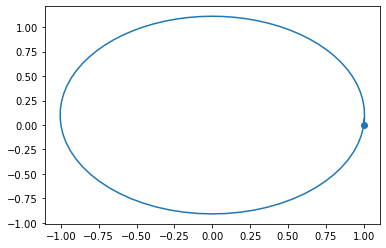

In [7]:
o_e.plot()

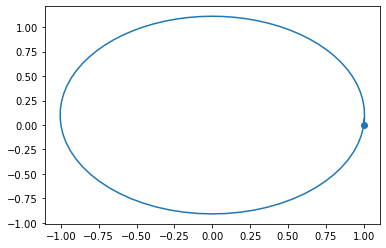

In [8]:
o_e.plot()

## Demonstration of caching

When it is first run, it takes approximately 580 ms

When it is run subsequently, it only takes ~8 ms

In general, caching is possible if ```@memoized``` is placed infront of any function. 
You just need to have ```from memo import memoized``` in the preamble.

In [9]:
# **** first run
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(54000, 56000, 1)]

453 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
# repeat
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(54000, 56000, 1)]

5.03 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
# repeat
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(54000, 56000, 1)]

19.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
# repeat
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(54000, 56000, 1)]

13.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
sys.getsizeof(o_e)

56

In [14]:
# **** new range
%timeit -r 1 -n 1 [o_e.rv(epoch=epoch) for epoch in range(56000, 58000, 1)]

501 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
# repeat
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(56000, 58000, 1)]

664 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
# repeat
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(56000, 58000, 1)]

7.74 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
# repeat
%timeit -r 1 -n 1 [o_e.rv(epoch) for epoch in range(56000, 58000, 1)]

18.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
sys.getsizeof(o_e)

56

In [19]:
## demonstration of accuracy of propagation

In [20]:
v_ref   = np.sqrt(mu/AU2km)
r_earth = np.array([1, 0, 0])*AU2km
v_earth = np.array([0,1, 0])*v_ref
o_e = Orbit(name="Earth", mu=mu)
o_e.from_rv(epoch=54000, r=r_earth, v=v_earth)

In [21]:
o_e

Earth

In [22]:
print(o_e.details())

Orbit: Earth
 Epoch     : 54000
 a         :  1.00000000 AU
 e         :  0.00000000
 inc       :  0.00000000 deg
 LAN       :  0.00000000 deg
 argp      :  0.00000000 deg
 meanAnom0 :  0.00000000 deg
 trueAnom0 :  0.00000000 deg
 h         :  4457215463.14531040 km2/s
 r0        :  [1.00000000 0.00000000 0.00000000] AU
 v0        :  [0.00000000 29.77474190 0.00000000] km/s


In [23]:
period = 2*np.pi*np.sqrt(AU2km**3/mu)

In [24]:
rv=o_e.rv(54000+period/day2s)

In [25]:
el.rv2coe(o_e.mu, *rv)

(4457215463.14531, 3.8471173155005466e-16, 0.0, 0.0, 0.0, 6.283185307179573)

In [26]:
# which is extremely close to what we started with!

In [27]:
sys.getsizeof(o_e)

56

In [28]:
54000 + 366*10

57660

In [29]:
pos = [o_e.rv(epoch) for epoch in range(54000, 57660, 1)]

In [30]:
sys.getsizeof(pos)

30120

In [31]:
sys.getsizeof(o_e)

56

In [32]:
sys.getsizeof(tuple(pos))

29328

In [33]:
# so infact the memory isnt even much of an issue